Binary classification of problem of students graduating or dropping out
Algorithm: Decision Tree
Author: Demetreous Stillman

In [294]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.ensemble import BalancedRandomForestClassifier

In [295]:
# Load the CSV file into a dataFrame
df_with_enrolled = pd.read_csv("/Users/demetreousstillman/Desktop/CSE_5160_Project/dropout_data.csv", sep=";")

# Display the head of the dataFrame
print(df_with_enrolled.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [296]:
# Gives the number of instances in each class
class_distribution = df_with_enrolled['Target'].value_counts()
print(class_distribution)

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [297]:
# Filter rows where the 'Target' column is not equal to 'Enrolled'
df = df_with_enrolled[df_with_enrolled['Target'] != 'Enrolled']

# Print the filtered DataFrame
print(df.head())


   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [298]:
# Gives the number of instances in each class
class_distribution = df['Target'].value_counts()
print(class_distribution)

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64


In [299]:
# Define a mapping dictionary to convert categories to numerical values
target_mapping = {'Graduate': 0, 'Dropout': 1}

# Use the mapping dictionary to replace values in the "Target" column
df['Target'] = df['Target'].replace(target_mapping)

/var/folders/9g/2y_gmxqn22l8hl960qphhhmw0000gn/T/ipykernel_14263/1519966587.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].replace(target_mapping)


In [ ]:
# Prints the name of the columns of the dataFrame
df.columns

In [ ]:
# Provides a consice summary of the dataFrame giving data on data types and number of null values
df.info()

In [ ]:
# generates descriptive statistics for numerical columns in the dataFrame
df.describe()

In [300]:
# X contains all columns except the "Target" column
X = df.drop("Target", axis=1) 

# y contains only the "Target" column
y = df["Target"]

In [ ]:
print(X)
X.columns

In [ ]:
print(y)

In [301]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

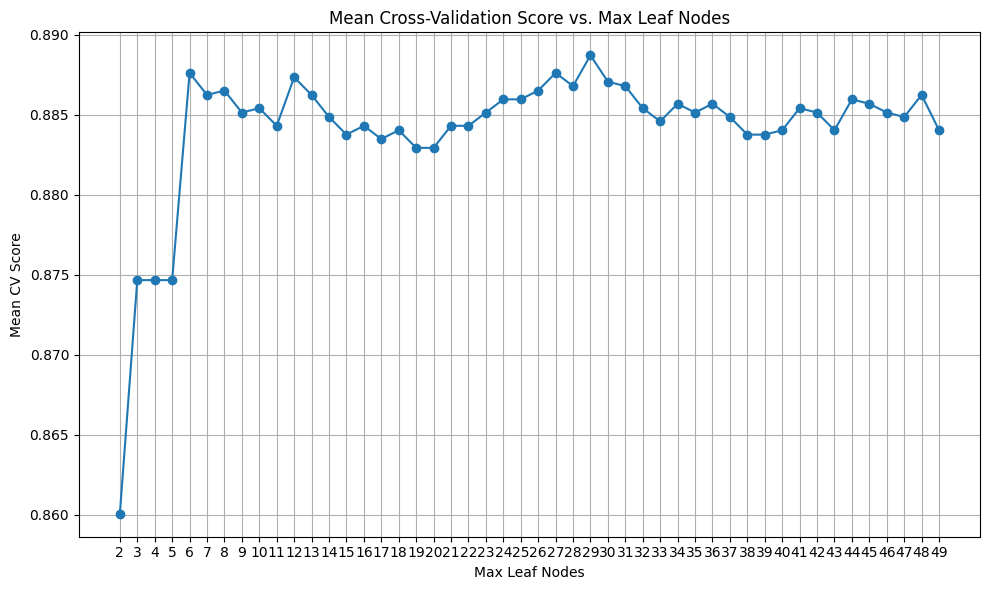

In [302]:
# Perform cross-validation for different max leaf nodes
max_leaf_nodes_list = []
mean_cv_scores = []

for max_leaf_nodes in range(2, 50):
    class_weights = {0: 1.0, 1: 1.55453905700211}
    dt_cv = tree.DecisionTreeClassifier(max_leaf_nodes = max_leaf_nodes, class_weight = class_weights, criterion = "gini")
    dt_cv.fit(X_train, y_train)
    cv_scores = cross_val_score(dt_cv, X, y, cv = 10)
    max_leaf_nodes_list.append(max_leaf_nodes)
    mean_cv_scores.append(cv_scores.mean())

#Plot the line graph 
plt.figure (figsize=(10, 6))
plt.plot(max_leaf_nodes_list, mean_cv_scores, marker= 'o')
plt.title('Mean Cross-Validation Score vs. Max Leaf Nodes')
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Mean CV Score')
plt.grid(True)
plt.xticks(range (2, 50))
plt.tight_layout()
plt.show()

In [313]:
# Creates the decision tree
class_weights = {0: 1.0, 1: 1.55453905700211} # Class weights added becauses of the class imbalance
#class_weights = {0: 1.0, 1: 3.0} # recall is a little better
dt = tree.DecisionTreeClassifier(max_leaf_nodes=29, class_weight=class_weights, criterion="gini")


#Fits the training data to the model
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 1.0, 1: 1.55453905700211},
                       max_leaf_nodes=29)

[Text(0.4264705882352941, 0.9375, 'Curricular units 2nd sem (approved) <= 4.5\ngini = 0.5\nsamples = 2904\nvalue = [1760.0, 1778.393]'),
 Text(0.22058823529411764, 0.8125, 'Curricular units 2nd sem (approved) <= 3.5\ngini = 0.213\nsamples = 1147\nvalue = [202.0, 1469.039]'),
 Text(0.11764705882352941, 0.6875, 'Curricular units 2nd sem (enrolled) <= 0.5\ngini = 0.124\nsamples = 951\nvalue = [95.0, 1330.685]'),
 Text(0.058823529411764705, 0.5625, 'Admission grade <= 136.05\ngini = 0.478\nsamples = 127\nvalue = [64.0, 97.936]'),
 Text(0.029411764705882353, 0.4375, 'gini = 0.359\nsamples = 62\nvalue = [20.0, 65.291]'),
 Text(0.08823529411764706, 0.4375, 'Tuition fees up to date <= 0.5\ngini = 0.489\nsamples = 65\nvalue = [44.0, 32.645]'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.262\nsamples = 9\nvalue = [2.0, 10.882]'),
 Text(0.11764705882352941, 0.3125, 'Previous qualification (grade) <= 157.5\ngini = 0.45\nsamples = 56\nvalue = [42.0, 21.764]'),
 Text(0.08823529411764706, 0.1875, '

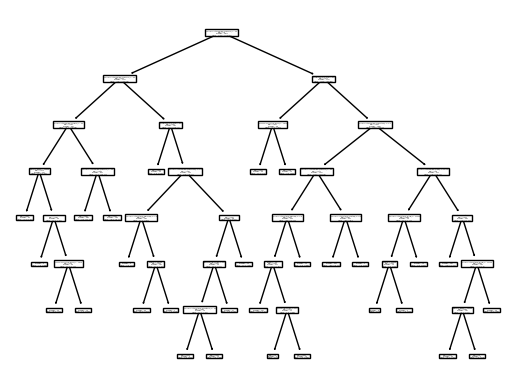

In [320]:
# Creates Tree diagram
tree.plot_tree(dt,feature_names=X.columns)

In [315]:
scores = cross_val_score(dt, X_train, y_train, cv=10)
print("Cross Validation Scores Array:")
print(scores)
print("\nMean Cross Validation Score:", np.mean(scores))
print("Standard Deviation of Cross Validation Scores:", np.std(scores))


Cross Validation Scores Array:
[0.89347079 0.92439863 0.86597938 0.88316151 0.89655172 0.89310345
 0.89655172 0.8862069  0.84827586 0.89310345]

Mean Cross Validation Score: 0.8880803412726627
Standard Deviation of Cross Validation Scores: 0.019085649675112806


In [316]:
# Evaluate training accuracy
y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate test accuracy
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9184
Test Accuracy: 0.8898


In [317]:
# Evaluate training error
train_error = mean_squared_error(y_train, y_train_pred)
print(f"Training Error: {train_error:.4f}")

# Evaluate test accuracy
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Test Error: {test_error:.4f}")

Training Error: 0.0816
Test Error: 0.1102


In [318]:
target_names = ['Graduate', 'Dropout']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

    Graduate       0.90      0.92      0.91       449
     Dropout       0.87      0.84      0.85       277

    accuracy                           0.89       726
   macro avg       0.88      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



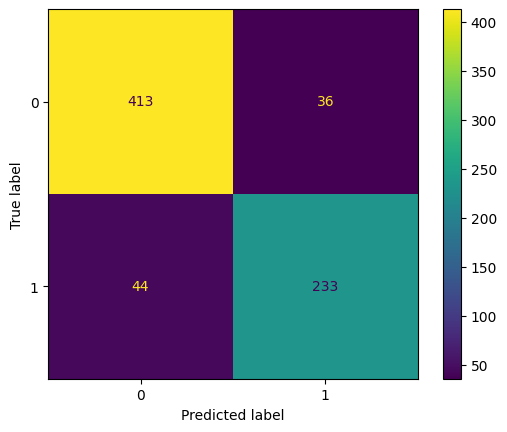

In [319]:
# Creates confusion matrix diagram
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()